# Introduction

## Problem statement and justification for the proposed approach.

# Libraries

#### Add requirments.txt later

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# EDA

In [2]:
df =  pd.read_csv('World-Stock-Prices-Dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-06-12 00:00:00-04:00,7.260000,7.350000,6.990000,7.320000,9906900.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-06-12 00:00:00-04:00,103.129997,103.889999,101.290001,103.660004,1262400.0,0.0,0.0,crocs,CROX,footwear,usa,NaN
2,2025-06-12 00:00:00-04:00,72.250000,72.400002,71.599998,72.239998,12748000.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
3,2025-06-12 00:00:00-04:00,118.790001,119.610001,118.480003,118.650002,33400.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
4,2025-06-12 00:00:00-04:00,296.670013,298.579987,294.000000,297.989990,1604000.0,0.0,0.0,american express,AXP,finance,usa,NaN


In [4]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64
Dividends,float64
Stock Splits,float64
Brand_Name,object
Ticker,object


In [5]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [6]:
df.dtypes

,0
Date,"datetime64[ns, UTC]"
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64
Dividends,float64
Stock Splits,float64
Brand_Name,object
Ticker,object


In [7]:

df_filtered = df.copy()
df_filtered = df_filtered[df_filtered["Country"] == "usa"]
df_filtered = df_filtered.drop(['Brand_Name', 'Capital Gains', 'Country', 'Industry_Tag', 'Stock Splits', 'Dividends'], axis=1)
df_filtered.head()


,Date,Open,High,Low,Close,Volume,Ticker
0,2025-06-12 04:00:00+00:00,7.260000,7.350000,6.990000,7.320000,9906900.0,PTON
1,2025-06-12 04:00:00+00:00,103.129997,103.889999,101.290001,103.660004,1262400.0,CROX
2,2025-06-12 04:00:00+00:00,72.250000,72.400002,71.599998,72.239998,12748000.0,KO
4,2025-06-12 04:00:00+00:00,296.670013,298.579987,294.000000,297.989990,1604000.0,AXP
6,2025-06-12 04:00:00+00:00,372.230011,374.170013,369.549988,371.399994,4868200.0,V


In [8]:
df_filtered.set_index('Date', inplace=True)
df_filtered.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2025-06-12 04:00:00+00:00,7.260000,7.350000,6.990000,7.320000,9906900.0,PTON
2025-06-12 04:00:00+00:00,103.129997,103.889999,101.290001,103.660004,1262400.0,CROX
2025-06-12 04:00:00+00:00,72.250000,72.400002,71.599998,72.239998,12748000.0,KO
2025-06-12 04:00:00+00:00,296.670013,298.579987,294.000000,297.989990,1604000.0,AXP
2025-06-12 04:00:00+00:00,372.230011,374.170013,369.549988,371.399994,4868200.0,V


In [9]:
df_filtered.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Ticker,0


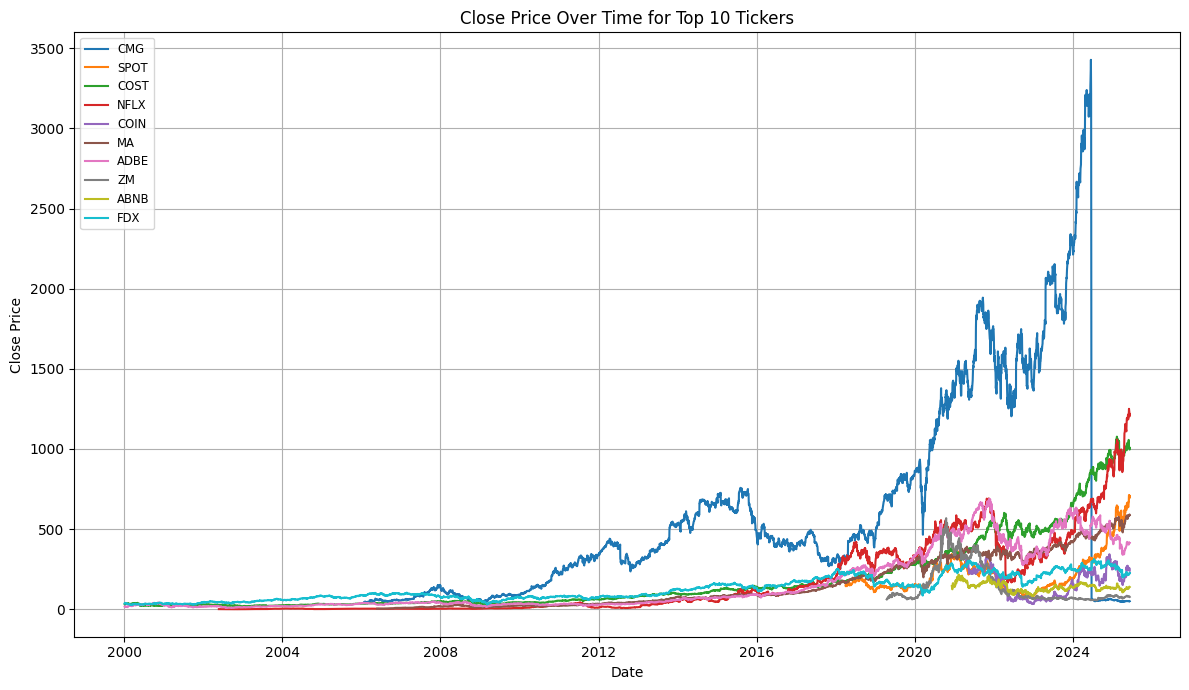

In [10]:
top_tickers = (
    df_filtered.groupby("Ticker")["Close"]
    .mean()
    .nlargest(10)
    .index
)

plt.figure(figsize=(12, 7))
for ticker in top_tickers:
    df_ticker = df_filtered[df_filtered["Ticker"] == ticker]
    plt.plot(df_ticker.index, df_ticker["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price Over Time for Top 10 Tickers")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
df_stock = df_filtered[df_filtered["Ticker"] == "NFLX"].copy()
df_stock = df_stock.sort_index()

In [12]:
df_stock.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2002-05-23 04:00:00+00:00,1.156429,1.242857,1.145714,1.196429,104790000.0,NFLX
2002-05-24 04:00:00+00:00,1.214286,1.225000,1.197143,1.210000,11104800.0,NFLX
2002-05-28 04:00:00+00:00,1.213571,1.232143,1.157143,1.157143,6609400.0,NFLX
2002-05-29 04:00:00+00:00,1.164286,1.164286,1.085714,1.103571,6757800.0,NFLX
2002-05-30 04:00:00+00:00,1.107857,1.107857,1.071429,1.071429,10154200.0,NFLX


In [13]:
df_fe = df_stock.copy()

df_fe['Close_lag_1'] = df_fe['Close'].shift(1)

df_fe['Return_1d'] = df_fe['Close'].pct_change()

df_fe['MA_5'] = df_fe['Close'].rolling(window=5).mean()
df_fe['MA_20'] = df_fe['Close'].rolling(window=20).mean()

df_fe['Volatility_10d'] = df_fe['Close'].rolling(window=10).std()

df_fe['Volume_MA_10'] = df_fe['Volume'].rolling(window=10).mean()
df_fe['Volume_Ratio'] = df_fe['Volume'] / df_fe['Volume_MA_10']

df_fe.dropna(inplace=True)
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Close_lag_1', 'Return_1d',
    'MA_5', 'MA_20',
    'Volatility_10d',
    'Volume_Ratio'
]


# Data preparation & Feature engineering – data pre-processing – missing values, outliers, etc.
# Feature Selection – how were the features selected based on the data analysis?

# Model Training
## selection, comparison, tuning, and analysis – consider ensembles.

## I. Logistic Regression

## II. LSTM

After multiple iterations extra features were increasing error rates so we selected open, high, low, and close as the features used to train and the goal is to predict future closing prices.

In [44]:
features = [
    'Open', 'High', 'Low', 'Close']
df_stock = df_fe[features]

A 80%/20% train test split was used and scaled fpr training purposes

In [45]:
train_size = int(len(df_stock) * 0.8)
df_train = df_stock.iloc[:train_size]
df_test = df_stock.iloc[train_size:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)

To prepare the dataset for time series forecasting, the raw input data was transformed into a supervised learning format using a sliding window approach. Specifically, a function was implemented to generate input-output pairs for the model, where each input represents a fixed-length sequence of past time steps, and the output corresponds to the target value (the closing price) at the next time step.

Sequence Construction Details:
A sequence length (seq_length) of 20 days was used, meaning each input sample (X) consists of the feature values over 20 consecutive time steps.

The corresponding target (y) is the closing price on the 21st day, i.e., the day immediately following the input sequence.

The function iterates through the dataset to extract all possible overlapping sequences, enabling the model to learn from a rich set of temporal patterns.

Tensor Preparation:
The input (X_train) and target (y_train) arrays are converted to PyTorch tensors to facilitate training in a deep learning framework.

The target tensor is reshaped to have two dimensions ((N, 1)) to match the expected output shape of the model.

Purpose:
This preprocessing step transforms the time series problem into a format suitable for sequence-based models like Long Short-Term Memory (LSTM) networks. By leveraging historical windows of data, the model is trained to predict future stock closing prices based on past trends and patterns.



In [46]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, features.index('Close')]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

A custom LSTM-based neural network was implemented using PyTorch to predict next-day closing prices from historical stock data.

The model consists of a two-layer LSTM network with 128 hidden units per layer and a dropout rate of 0.2 to prevent overfitting. It accepts sequences of multivariate input features and processes them in a batch-first format.

Only the final hidden state from the last time step is used for prediction. This output is passed through a fully connected linear layer that maps the hidden state to a single scalar value representing the predicted closing price.

This architecture captures temporal patterns effectively, making it suitable for time series forecasting.

In [47]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel(input_size=len(features), hidden_size=128)

In [48]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.1291
Epoch 10, Loss: 0.0328
Epoch 20, Loss: 0.0037
Epoch 30, Loss: 0.0015
Epoch 40, Loss: 0.0011


A recursive forecasting loop was implemented to generate multi-step future predictions using the trained LSTM model. Each prediction is based on a rolling 20 day sequence of past stock data.

To begin, the final 20 day sequence from the training data is used as the initial input. This sequence is passed through the model to predict the next day closing price. The predicted value replaces the actual closing price in the corresponding scaled test row to maintain temporal consistency.

The updated row is then appended to the input sequence, and the window is shifted forward by one day and dropping the oldest entry and including the newest. This updated 20 day sequence is used to predict the following day’s closing price. The process is repeated iteratively across the entire test period.

This step wise prediction strategy allows the model to simulate real world use cases, where future data must be inferred one day at a time based on recent history and prior predictions.

In [49]:
scaled_test = scaler.transform(df_test[features])
input_seq = scaled_train[-seq_length:].copy()
future_preds = []

for i in range(len(df_test)):
    input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        next_scaled = model(input_tensor).item()

    actual_next_row = scaled_test[i].copy()
    actual_next_row[features.index('Close')] = next_scaled

    future_preds.append(actual_next_row.copy())
    input_seq = np.vstack([input_seq[1:], actual_next_row])



The predicted values, originally in scaled form, are reshaped to match the scaler’s expected input shape. Using the fitted MinMaxScaler, the data is inverse-transformed to restore the original value range. The closing prices are then extracted from the transformed output, yielding final predictions in actual price units.

In [50]:
pred_arr = np.array(future_preds).reshape(-1, len(features))
predicted_closes = scaler.inverse_transform(pred_arr)[:, features.index('Close')]


The predicted closing values versus the actual closing values for the test set were plotted to view the differences

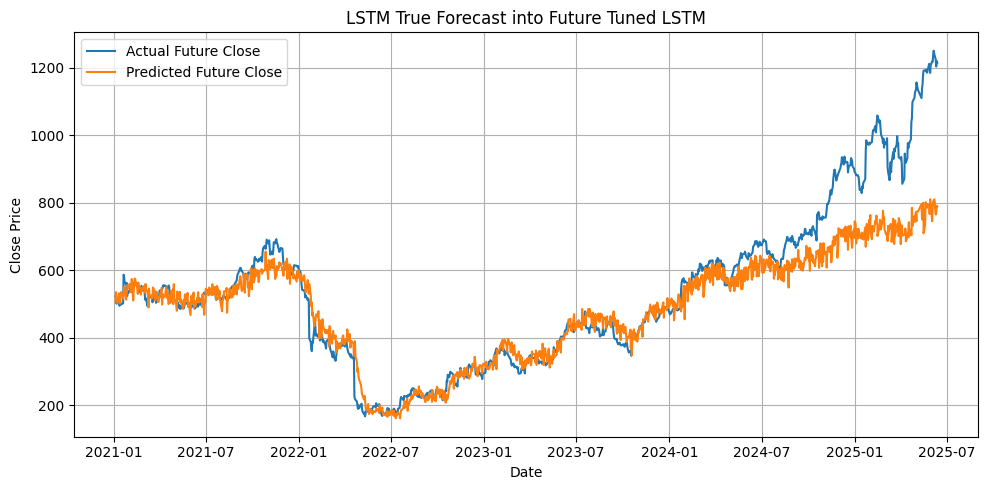

In [58]:
actual_closes = df_test['Close'].values

plt.figure(figsize=(10, 5))
plt.plot(df_test.index, actual_closes, label='Actual Future Close')
plt.plot(df_test.index,predicted_closes, label='Predicted Future Close')
plt.title("LSTM True Forecast into Future Tuned LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predicted = predicted_closes
actual = actual_closes

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
r2 = r2_score(actual, predicted)
directional_accuracy = np.mean(np.sign(np.diff(actual)) == np.sign(np.diff(predicted)))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2%}")


MAE: 65.0402
RMSE: 112.5945
MAPE: 9.73%
R²: 0.7754
Directional Accuracy: 47.43%


The stock price prediction model demonstrates strong regression performance, with a Mean Absolute Error ( MAE ) of 65.04 Dollars, Root Mean Squared Error  ( RMSE )  of 112.59 Dollars, and a Mean Absolute Percentage Error (MAPE) of 9.73%, indicating reasonable accuracy across different price levels. The R² score of 0.7754 shows that the model explains approximately 77.5% of the variance in actual closing prices, which is a solid outcome given the volatility of financial markets. However, the directional accuracy is only 47.43%, falling below the 50% threshold required for reliable trend forecasting. This limits its practical utility for trading applications. To improve, future efforts should focus on enhancing directional prediction through classification models, incorporating technical indicators (e.g., moving averages, RSI), or adopting hybrid approaches that combine both regression and classification techniques.


# Model Evaluation
##  performance measures, results, and conclusions.

## I. Logistic Regression

## II. LSTM

# Model Selection

## I. Logistic Regression

## II. LSTM

# Deployment - A discussion of either the hypothetical deployment of the model or the actual deployment of the model if it has been deployed.

# Discussion and conclusions – address the problem statement and recommendation.